In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium 
from folium.plugins import HeatMap

In [2]:
# Ignoring Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Building and Property Violations Dataset
# Converting all Contact City values in the dataframe to upper case

vio = pd.read_csv("Building and Property Violations.csv")
vio['contact_city'] = vio['contact_city'].str.upper()
vio.head(2)

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.550 B,NaN,"Extermination of Insects, Rodents and Skunks -...",19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
1,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"


In [4]:
# Importing the Climate Ready Boston Social Vulnerability Dataset

vulnerable = pd.read_csv("Climate_Ready_Boston_Social_Vulnerability.csv")
vulnerable['Name'] = vulnerable['Name'].str.upper()
vulnerable.head(2)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,MISSION HILL,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,FENWAY,250612.382812,2176.592171


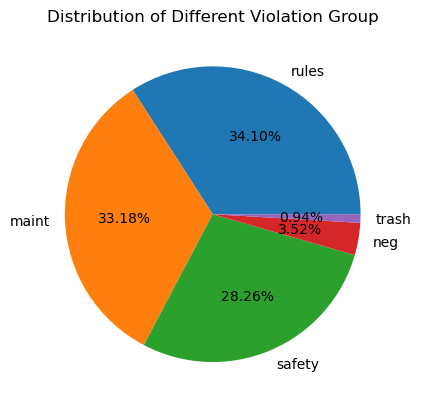

In [5]:
# Importing the code for each violation group
# Merging the code and violation dataframe and plotting a pie chart for each type of violation based on its percentage

code = pd.read_csv("codes.csv")
vio_ = pd.merge(vio, code, left_on='code', right_on='Code')
r = vio_['ViolationGroup'].value_counts()

fig = plt.figure()
plt.pie(r.values, labels = r.index, autopct = '%1.2f%%')
plt.title("Distribution of Different Violation Group")
plt.show()
#plt.savefig("Distribution of Different Violation Group")

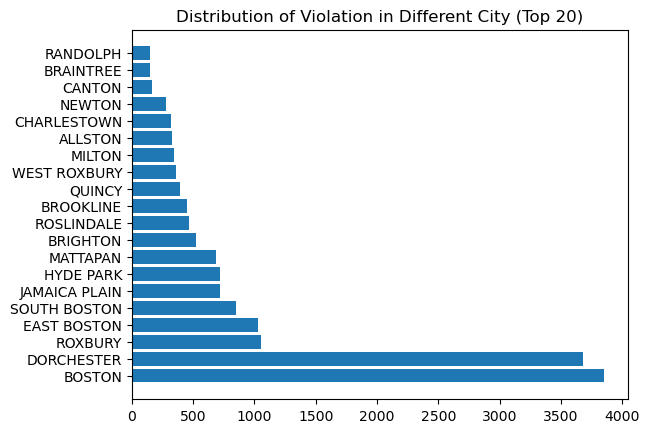

<Figure size 640x480 with 0 Axes>

In [5]:
# Plotting graph for total no. of violations per Boston Neighborhood

violation_in_each_contact_city = vio['contact_city'].value_counts()
v20 = violation_in_each_contact_city.head(20)

fig = plt.figure()
plt.barh(v20.index, v20.values)
plt.title("Distribution of Violation in Different City (Top 20)")
plt.show()
plt.savefig("Distribution of Violation in Different City (Top 20)")

In [6]:
# Extracting the Top 20 neighborhoods with highest number of violations and getting their names (using x.keys())

x = vio['contact_city'].value_counts()[:20]
y = vio['contact_city'].value_counts()
a = x.keys()

In [7]:
# Finding the total no. of houses in the Building and Property Violations Dataset

summ = 0.0
for i in range(len(y)):
    summ+=y[i]
summ

21715.0

In [9]:
# Finding the percentage of violations in these Top 20 neighborhoods with most violations

percts = []
for i in range(len(x)):
    percts.append((x[i]/summ)*100)

In [10]:
# Printing those percentages

percts

[17.748100391434495,
 16.965231406861616,
 4.835367257655998,
 4.738659912502878,
 3.923555146212296,
 3.3294957402717014,
 3.3064701819019113,
 3.149896384987336,
 2.4268938521759154,
 2.1505871517384296,
 2.0584849182592677,
 1.8005986645176146,
 1.6532350909509557,
 1.579553304167626,
 1.524291964080129,
 1.4690306239926318,
 1.289431268708266,
 0.7460280911812112,
 0.6815565277457979,
 0.6723463043978816]

<BarContainer object of 20 artists>

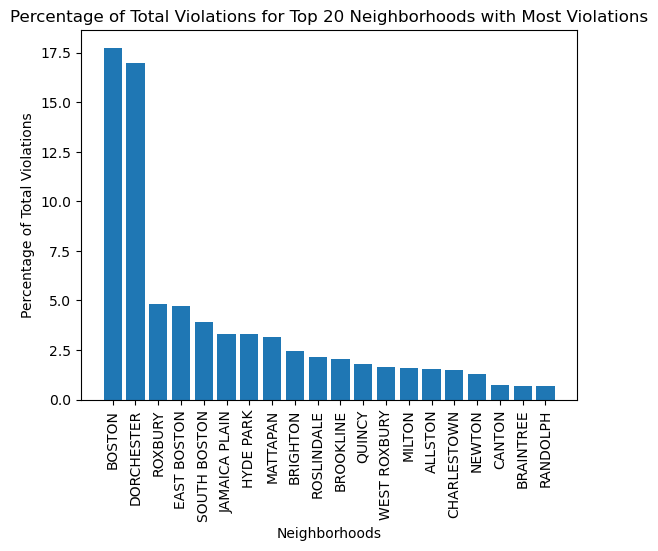

In [11]:
# Plotting the percentage of violations for the Top 20 neighbothoods with highest violations in Boston City

plt.xticks(rotation = 90)
plt.xlabel("Neighborhoods")
plt.ylabel("Percentage of Total Violations")
plt.title("Percentage of Total Violations for Top 20 Neighborhoods with Most Violations")
plt.bar(a, percts)

In [12]:
# Printing the head of the Boston Violation Dataset

vio.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.550 B,NaN,"Extermination of Insects, Rodents and Skunks -...",19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
1,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.482 A,NaN,Smoke Detectors & Carbon Monoxide Alarms - Own...,19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
2,HVIOL-644882,2022-11-18 09:50:19,Open,CRM410.550 D,NaN,"Extermination of Insects, Rodents and Skunks -...",19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
3,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.550 B,NaN,"Extermination of Insects, Rodents and Skunks -...",19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"
4,HVIOL-644882,2022-11-18 09:50:19,Open,CMR410.351 A,NaN,Owners Installation/Maintenance Responsibility...,19,NaN,Adams,ST,...,15,77 Pond Ave #401,NaN,BROOKLINE,MA,02445,175531,42.3076,-71.0634,"(42.30760000002404, -71.06340000126664)"


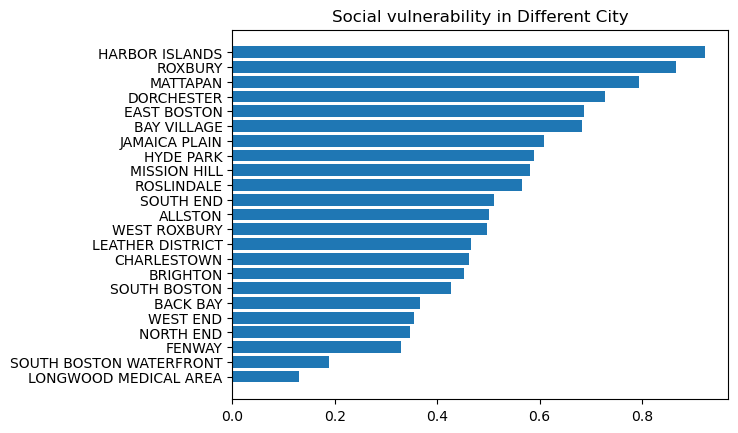

<Figure size 640x480 with 0 Axes>

In [8]:
# Plotting a graph for the Social Vulnerability Scores per neighborhood in Boston city

vulnerable['Total_v'] = vulnerable['TotDis'] + vulnerable['TotChild'] + vulnerable['OlderAdult'] + vulnerable['Low_to_No'] + vulnerable['LEP'] + vulnerable['POC2'] + vulnerable['MedIllnes']

pop_each_area = vulnerable.groupby(by=vulnerable['Name'])['POP100_RE'].sum()
vul_each_area = vulnerable.groupby(by=vulnerable['Name'])['Total_v'].sum()

dic = {'Name': pop_each_area.index, 'Pop': pop_each_area.values, 'Vul': vul_each_area.values}
d = pd.DataFrame(dic)
d['Social vulnerability'] = (d['Vul']/d['Pop'] - 0.5)/2.5
d.sort_values(by='Social vulnerability' , ascending=True, inplace=True)

fig = plt.figure()
plt.barh(d['Name'], d['Social vulnerability'])
plt.title("Social vulnerability in Different City")
plt.show()
plt.savefig("Social vulnerability in Different City")


In [16]:
# Printing the number of vulnerable people per neighborhood in Boston city

vulnerable.groupby(by='Name')['Total_v'].sum()

Name
ALLSTON                     13303.85
BACK BAY                    40493.96
BAY VILLAGE                 23951.93
BRIGHTON                    99278.80
CHARLESTOWN                 27214.47
DORCHESTER                 161599.76
EAST BOSTON                 89818.60
FENWAY                      35935.74
HARBOR ISLANDS               1501.53
HYDE PARK                   32721.46
JAMAICA PLAIN               85449.57
LEATHER DISTRICT             9827.59
LONGWOOD MEDICAL AREA        4023.08
MATTAPAN                    82344.87
MISSION HILL                44067.93
NORTH END                   23094.86
ROSLINDALE                 116705.32
ROXBURY                    207474.10
SOUTH BOSTON                34553.16
SOUTH BOSTON WATERFRONT      5975.93
SOUTH END                   29176.80
WEST END                     9514.82
WEST ROXBURY                40045.90
Name: Total_v, dtype: float64

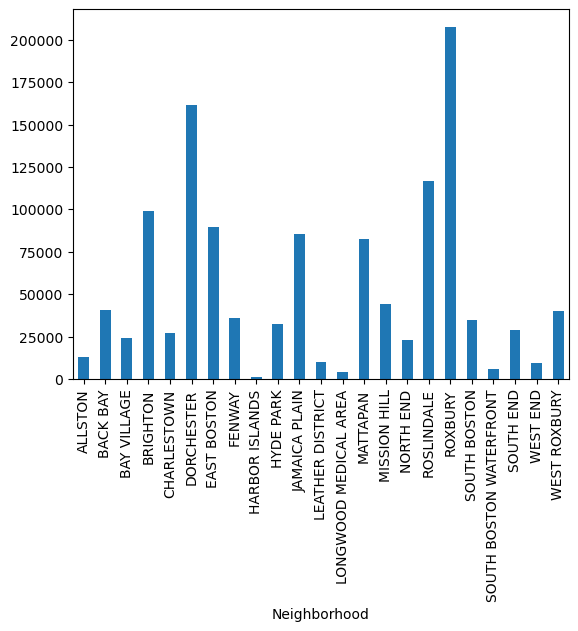

In [17]:
# Plotting the number of vulnerable people per neighborhood in Boston city

#plt.plot(vulnerable['Name'].unique(), , kind='bar')
vulnerable.groupby(by='Name')['Total_v'].sum().plot(kind = 'bar')
plt.xlabel("Neighborhood")
plt.show()

In [9]:
# Calculating and assigning each neighborhood a vulnerability rank based on their Social Vulnerability values

# Social Vulnerability Rank (1: most vulnerable, 23: least vulnerable)
d['Vulnerability_rank'] = d['Social vulnerability'].rank(method = 'first', ascending=False).values
d.head(10)

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank
12,LONGWOOD MEDICAL AREA,4861,4023.08,0.131050,23.0
19,SOUTH BOSTON WATERFRONT,6135,5975.93,0.189629,22.0
7,FENWAY,27138,35935.74,0.329674,21.0
15,NORTH END,16880,23094.86,0.347272,20.0
21,WEST END,6853,9514.82,0.355367,19.0
1,BACK BAY,28634,40493.96,0.365677,18.0
18,SOUTH BOSTON,22067,34553.16,0.426332,17.0
3,BRIGHTON,60821,99278.80,0.452924,16.0
4,CHARLESTOWN,16439,27214.47,0.462193,15.0
11,LEATHER DISTRICT,5902,9827.59,0.466052,14.0


In [10]:
# Creating a DataFrame with each neighborhood, the number of violations in that neighborhood, and its violation rank

# Violation Rank (1: with )
dicV = {'Name': violation_in_each_contact_city.index, 'Vio_num':violation_in_each_contact_city.values}
v = pd.DataFrame(dicV)
v['Violation_rank'] = v['Vio_num'].rank(method = 'first', ascending=False).values
v.head(10)

,Name,Vio_num,Violation_rank
0,BOSTON,3854,1.0
1,DORCHESTER,3684,2.0
2,ROXBURY,1050,3.0
3,EAST BOSTON,1029,4.0
4,SOUTH BOSTON,852,5.0
5,JAMAICA PLAIN,723,6.0
6,HYDE PARK,718,7.0
7,MATTAPAN,684,8.0
8,BRIGHTON,527,9.0
9,ROSLINDALE,467,10.0


In [11]:
# Merging both the above datasets to contain both vulnerability and violation data

rank = pd.merge(d, v, left_on='Name', right_on='Name')
rank

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank,Vio_num,Violation_rank
0,SOUTH BOSTON,22067,34553.16,0.426332,17.0,852,5.0
1,BRIGHTON,60821,99278.80,0.452924,16.0,527,9.0
2,CHARLESTOWN,16439,27214.47,0.462193,15.0,319,16.0
3,WEST ROXBURY,22952,40045.90,0.497907,13.0,359,13.0
4,ALLSTON,7592,13303.85,0.500940,12.0,331,15.0
5,ROSLINDALE,60973,116705.32,0.565620,10.0,467,10.0
6,MISSION HILL,22576,44067.93,0.580793,9.0,6,197.0
7,HYDE PARK,16585,32721.46,0.589182,8.0,718,7.0
8,JAMAICA PLAIN,42251,85449.57,0.608971,7.0,723,6.0
9,EAST BOSTON,40517,89818.60,0.686725,5.0,1029,4.0


In [12]:
# Importing Rentsmart Dataset

rentsmart = pd.read_csv("Rentsmart.csv")
rentsmart.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2022-11-20T00:00:00,Enforcement Violations,Improper storage trash: res,"325-327 Dorchester St, 02127",South Boston,2127,700214040,THREE-25 -327 DORCHESTER ST CONDO TR,1928.0,2010.0,Condominium Main*,42.33124,-71.05411
1,2022-11-20T00:00:00,Enforcement Violations,Improper storage trash: res,"7 Aberdeen St, 02215",Boston,2215,2100139000,SEVEN 21 ABERDEEN STREET,1999.0,1999.0,Condominium Main*,42.34642,-71.10403
2,2022-11-20T00:00:00,Enforcement Violations,Improper storage trash: res,"62 H St, 02127",South Boston,2127,603197000,SIXTY-2 H STREET CONDO TR,1890.0,2009.0,Condominium Main*,42.33589,-71.04138
3,2022-11-19T00:00:00,Enforcement Violations,Occupying City prop wo permit,"9 Anderson St, 02114",Boston,2114,502218000,EMERALD REALTY CAPITAL LLC MASS LLC,1899.0,2014.0,Residential 7 or more units,42.36076,-71.06799
4,2022-11-19T00:00:00,Enforcement Violations,Improper storage trash: res,"9 Anderson St, 02114",Boston,2114,502218000,EMERALD REALTY CAPITAL LLC MASS LLC,1899.0,2014.0,Residential 7 or more units,42.36076,-71.06799


In [14]:
# Importing the House Violation Scores dataset (created by us)

viol_scores = pd.read_csv("House_Violation_Scores.csv")
viol_scores.head()
#rentsmart.tail()

,Unnamed: 0,Addresses,Violation Score
0,0,"225 Blue Hill Ave, 02119",335.1
1,1,"221 Paris St, 02128",240.3
2,2,"799 E Third St, 02127",167.4
3,3,"116 Bernard St, 02124",147.0
4,4,"76 Corbet St, 02124",140.4


In [15]:
# Creating a new dictionary with just the addresses and their respecitve violation scores

viol_scores_dict = dict(zip(viol_scores.Addresses, viol_scores['Violation Score']))

In [16]:
# Finding the violation scores of each neighborhood

import tqdm

neigh_scores = {}
for i in tqdm.tqdm(range(rentsmart.shape[0])):
    if rentsmart['neighborhood'][i] in neigh_scores.keys():
        neigh_scores[rentsmart['neighborhood'][i]] += viol_scores_dict[rentsmart['address'][i]]
    else:
        #print(rentsmart['neighborhood'][i])
        #print(viol_scores[i]['Violation Score'])
        neigh_scores[rentsmart['neighborhood'][i]] = viol_scores_dict[rentsmart['address'][i]]

100%|███████████████████████████████████████████████████████████████████████| 310522/310522 [00:09<00:00, 31060.56it/s]


In [17]:
neigh_scores

{'South Boston': 181873.20000000342,
 'Boston': 387834.90000006853,
 'Brighton': 93324.59999999394,
 'Allston': 76996.79999999504,
 'Dorchester': 573613.8000000918,
 'Hyde Park': 76106.39999999676,
 'Mattapan': 128221.1999999948,
 'Roxbury': 281125.20000002324,
 'Roslindale': 60097.79999999948,
 'Mission Hill': 56993.99999999888,
 'Jamaica Plain': 98248.49999999709,
 'East Boston': 147813.89999999688,
 'Charlestown': 35166.60000000018,
 'West Roxbury': 34410.30000000036,
 'Chestnut Hill': 509.99999999999994,
 nan: 6.3}

In [18]:
# Dropping the violation score for NaN

neigh_scores.popitem()

(nan, 6.3)

In [19]:
# Creating a new dictionary neigh_score

neigh_score = {}

In [20]:
# Storing the neighborhood violation scores in this new dictionary with the keys being neighborhood names (in UPPERCASE)

for k,v in neigh_scores.items():
    neigh_score.update({k.upper(): v})

In [21]:
# Printing the neighborhood violation scores

neigh_score

{'SOUTH BOSTON': 181873.20000000342,
 'BOSTON': 387834.90000006853,
 'BRIGHTON': 93324.59999999394,
 'ALLSTON': 76996.79999999504,
 'DORCHESTER': 573613.8000000918,
 'HYDE PARK': 76106.39999999676,
 'MATTAPAN': 128221.1999999948,
 'ROXBURY': 281125.20000002324,
 'ROSLINDALE': 60097.79999999948,
 'MISSION HILL': 56993.99999999888,
 'JAMAICA PLAIN': 98248.49999999709,
 'EAST BOSTON': 147813.89999999688,
 'CHARLESTOWN': 35166.60000000018,
 'WEST ROXBURY': 34410.30000000036,
 'CHESTNUT HILL': 509.99999999999994}

In [22]:
# Dropping the neighborhood violation score of Boston (since we don't have violation data for that neighborhood)

neigh_score.pop('BOSTON')

387834.90000006853

In [23]:
# Dropping the neighborhood violation score of Chestnut Hill (since we don't have violation data for that neighborhood)

neigh_score.pop('CHESTNUT HILL')

509.99999999999994

In [24]:
# Printing the vulnerability scores of all the remaining Boston Neighborhoods

neigh_score

{'SOUTH BOSTON': 181873.20000000342,
 'BRIGHTON': 93324.59999999394,
 'ALLSTON': 76996.79999999504,
 'DORCHESTER': 573613.8000000918,
 'HYDE PARK': 76106.39999999676,
 'MATTAPAN': 128221.1999999948,
 'ROXBURY': 281125.20000002324,
 'ROSLINDALE': 60097.79999999948,
 'MISSION HILL': 56993.99999999888,
 'JAMAICA PLAIN': 98248.49999999709,
 'EAST BOSTON': 147813.89999999688,
 'CHARLESTOWN': 35166.60000000018,
 'WEST ROXBURY': 34410.30000000036}

In [25]:
# Adding a new column neigh_scores to the DataFrame

rank['neigh_scores'] = 0.0
rank.reset_index(inplace = True)

In [26]:
rank.drop('index', axis = 1, inplace = True)

In [27]:
# Printing the DataFrame

rank

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank,Vio_num,Violation_rank,neigh_scores
0,SOUTH BOSTON,22067,34553.16,0.426332,17.0,852,5.0,0.0
1,BRIGHTON,60821,99278.80,0.452924,16.0,527,9.0,0.0
2,CHARLESTOWN,16439,27214.47,0.462193,15.0,319,16.0,0.0
3,WEST ROXBURY,22952,40045.90,0.497907,13.0,359,13.0,0.0
4,ALLSTON,7592,13303.85,0.500940,12.0,331,15.0,0.0
5,ROSLINDALE,60973,116705.32,0.565620,10.0,467,10.0,0.0
6,MISSION HILL,22576,44067.93,0.580793,9.0,6,197.0,0.0
7,HYDE PARK,16585,32721.46,0.589182,8.0,718,7.0,0.0
8,JAMAICA PLAIN,42251,85449.57,0.608971,7.0,723,6.0,0.0
9,EAST BOSTON,40517,89818.60,0.686725,5.0,1029,4.0,0.0


In [28]:
# Appending the Neighborhood Violation Scores to this new column

for i in range(rank.shape[0]):
    rank['neigh_scores'][i] = neigh_score[rank['Name'][i]]

In [29]:
# Printing the updated DataFrame

rank

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank,Vio_num,Violation_rank,neigh_scores
0,SOUTH BOSTON,22067,34553.16,0.426332,17.0,852,5.0,181873.2
1,BRIGHTON,60821,99278.80,0.452924,16.0,527,9.0,93324.6
2,CHARLESTOWN,16439,27214.47,0.462193,15.0,319,16.0,35166.6
3,WEST ROXBURY,22952,40045.90,0.497907,13.0,359,13.0,34410.3
4,ALLSTON,7592,13303.85,0.500940,12.0,331,15.0,76996.8
5,ROSLINDALE,60973,116705.32,0.565620,10.0,467,10.0,60097.8
6,MISSION HILL,22576,44067.93,0.580793,9.0,6,197.0,56994.0
7,HYDE PARK,16585,32721.46,0.589182,8.0,718,7.0,76106.4
8,JAMAICA PLAIN,42251,85449.57,0.608971,7.0,723,6.0,98248.5
9,EAST BOSTON,40517,89818.60,0.686725,5.0,1029,4.0,147813.9


In [30]:
# Creating a new DataFrame without Mission Hill (since Mission Hill acts as an outlier in the Correlation between 
# no. of violations and socially vulnerable population in a neighborhood)

rank_wML = rank[rank['Name'] != 'MISSION HILL']

In [31]:
# Printing this new DataFrame

rank_wML

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank,Vio_num,Violation_rank,neigh_scores
0,SOUTH BOSTON,22067,34553.16,0.426332,17.0,852,5.0,181873.2
1,BRIGHTON,60821,99278.80,0.452924,16.0,527,9.0,93324.6
2,CHARLESTOWN,16439,27214.47,0.462193,15.0,319,16.0,35166.6
3,WEST ROXBURY,22952,40045.90,0.497907,13.0,359,13.0,34410.3
4,ALLSTON,7592,13303.85,0.500940,12.0,331,15.0,76996.8
5,ROSLINDALE,60973,116705.32,0.565620,10.0,467,10.0,60097.8
7,HYDE PARK,16585,32721.46,0.589182,8.0,718,7.0,76106.4
8,JAMAICA PLAIN,42251,85449.57,0.608971,7.0,723,6.0,98248.5
9,EAST BOSTON,40517,89818.60,0.686725,5.0,1029,4.0,147813.9
10,DORCHESTER,69695,161599.76,0.727468,4.0,3684,2.0,573613.8


In [32]:
# Importing Seaborn

import seaborn as sns

In [33]:
# Finding the correlation between Vulnerability Rank and Violation Rank of Boston Neighborhoods

rank_wML['Vulnerability_rank'].corr(rank['Violation_rank'])

0.5971669856447147

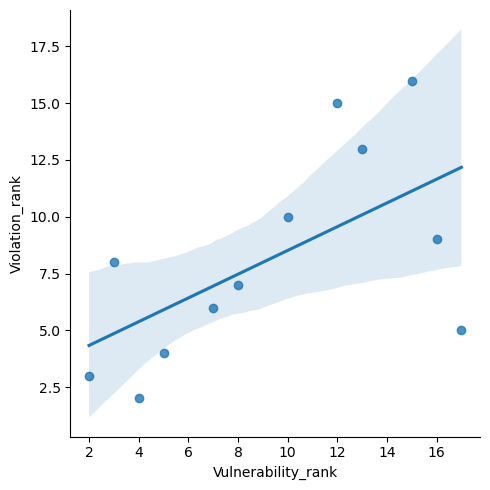

In [34]:
# Plotting this correlation

sns.lmplot(x = "Vulnerability_rank", y="Violation_rank", data = rank_wML)

In [35]:
# Finding the correlation between Social Vulnerability and Violation Scores of Boston Neighborhoods

rank['Social vulnerability'].corr(rank['neigh_scores'])

0.527568686244648

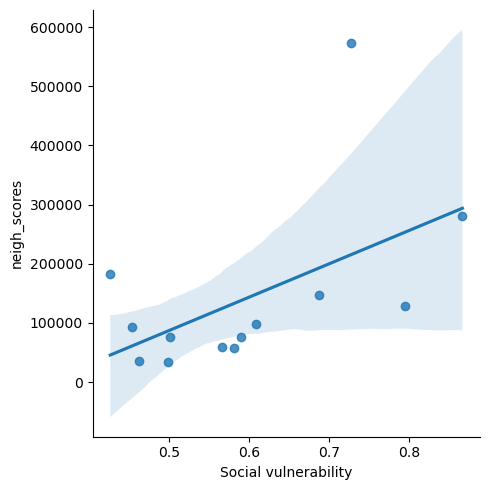

In [36]:
# Plotting this correlation

#ax = sns.scatterplot(x = "Social vulnerability", y="neigh_scores", data = rank)
sns.lmplot(x = "Social vulnerability", y="neigh_scores", data = rank)

In [37]:
# Finding the Normalized Population of each Neighborhood

rank["Normalized_Population"] = 0
total = 0
for i in range(rank.shape[0]):
    total+=rank["Pop"][i]
for i in range(rank.shape[0]):
    rank["Normalized_Population"][i]=rank["Pop"][i]/total

In [38]:
# Printing the Modified DataFrame

rank

,Name,Pop,Vul,Social vulnerability,Vulnerability_rank,Vio_num,Violation_rank,neigh_scores,Normalized_Population
0,SOUTH BOSTON,22067,34553.16,0.426332,17.0,852,5.0,181873.2,0.044726
1,BRIGHTON,60821,99278.80,0.452924,16.0,527,9.0,93324.6,0.123273
2,CHARLESTOWN,16439,27214.47,0.462193,15.0,319,16.0,35166.6,0.033319
3,WEST ROXBURY,22952,40045.90,0.497907,13.0,359,13.0,34410.3,0.046520
4,ALLSTON,7592,13303.85,0.500940,12.0,331,15.0,76996.8,0.015388
5,ROSLINDALE,60973,116705.32,0.565620,10.0,467,10.0,60097.8,0.123581
6,MISSION HILL,22576,44067.93,0.580793,9.0,6,197.0,56994.0,0.045758
7,HYDE PARK,16585,32721.46,0.589182,8.0,718,7.0,76106.4,0.033615
8,JAMAICA PLAIN,42251,85449.57,0.608971,7.0,723,6.0,98248.5,0.085635
9,EAST BOSTON,40517,89818.60,0.686725,5.0,1029,4.0,147813.9,0.082121


In [39]:
# Finding the correlation between Violation Scores of Neighborhoods Normalized Population of Neighborhoods

rank['neigh_scores'].corr(rank['Normalized_Population'])

0.6011313479532077

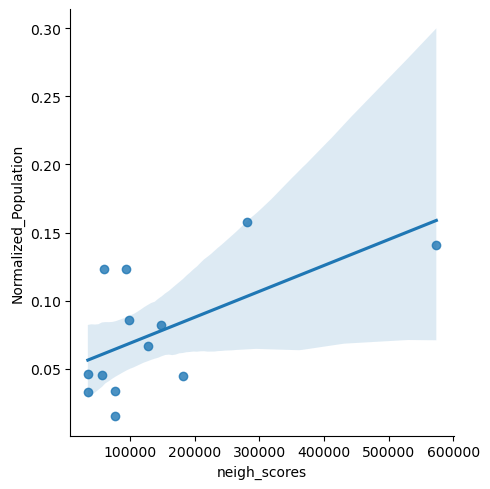

In [40]:
# Plotting this correlation

sns.lmplot(x = "neigh_scores", y="Normalized_Population", data = rank)

In [20]:
# Dropping Mission Hill since it is also an outlier w.r.t. Violation Rank and creating three lists for Neighborhood Name,
# vulnerability rank of each neighborhood, and violation rank of each neighborhood

rank = rank.drop(index = [6])
name_list = rank['Name']
vul_list = rank['Vulnerability_rank']
vio_list = rank['Violation_rank']

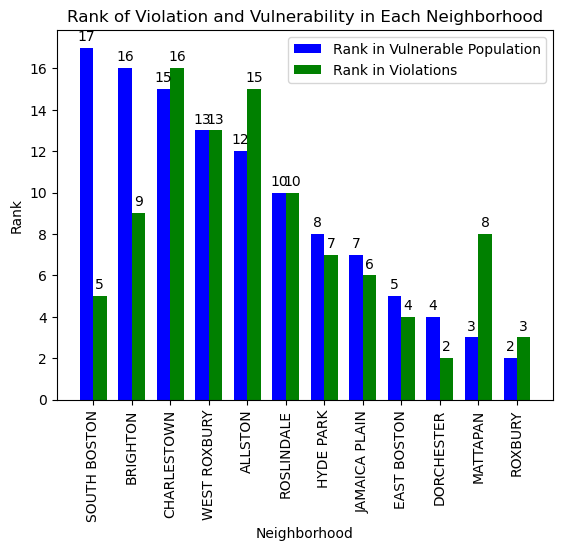

In [21]:
# Plotting a bar graph showcasing the vulnerability rank and violation rank of each neighborhood side by side

x = np.arange(len(name_list))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, vul_list, width, label = 'Rank in Vulnerable Population', fc = 'b')
rects2 = ax.bar(x+width/2, vio_list, width, label = 'Rank in Violations', fc = 'g')

ax.set_ylabel('Rank')
ax.set_xlabel('Neighborhood')
ax.set_title('Rank of Violation and Vulnerability in Each Neighborhood')
ax.set_xticks(x)
ax.set_xticklabels(name_list)
ax.legend()

def autolabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                   xy =(rect.get_x()+rect.get_width()/2, height),
                   xytext = (0,3),
                   textcoords = 'offset points',
                   ha = 'center',
                   va = 'bottom')
autolabels(rects1)
autolabels(rects2)

plt.xticks(rotation = 90)

#fig.tight_layout()
plt.show()